# "Продвинутый Python". Магистерская программа ВШЭ.

**Цель курса**: получить предстваление о принципах создания сервисов и реализовать их в собственном ML-проекте.

**Ключевые навыки**: ООП, Django, luigi

### Отчётность

Зачётные баллы будут даваться за:

1) __Курсовой проект__ 

В курсовом проекте необходимо будет сделать сервис, например, для решения какой-нибудь ML-задачи (но не обязательно). Список требований к сервису будет озвучен позже. За проект можно получить до **6 баллов**, причем проект должен сдаваться не за один раз. 

2) __Контрольные работы, контесты__ (но это не точно)

Проводятся на занятиях. Могут принести до **2 баллов**.

3) __Домашние задания__

Могут принести неопределенное количество баллов.

4) __Задания на занятии__

Несложные задания за мелкие баллы.

Суммарно можно будет **получить больше 10 баллов**. **Баллов хватит на всех :)**

Все задачи должны быть оформлены в соответствии с PEP 8.

## Занятие №0. Core libraries. Разминка.

In [11]:
import sys

**Как получить путь к интерпретатору?**

In [7]:
sys.executable;

**Как узнать, где ищутся модули для импорта?**

In [5]:
sys.path;

**Что может помочь написать кросс-платформенный код?**

In [8]:
sys.platform

'darwin'

**Как перенаправить поток вывода?**

In [10]:
with open('log.txt', 'w') as f:
    print(2, file=f)

2


### Задача №0

Вывести распределение слов в Zen of Python.

In [84]:
from io import StringIO

import sys

Перенаправим поток вывода в переменную

In [7]:
stdout = sys.stdout

text_from_this = StringIO()
sys.stdout = text_from_this

Запишем Zen of Python в переменную `text_from_this` и вернем консольный вывод

In [9]:
import this

In [82]:
sys.stdout = stdout 

In [11]:
import re
from collections import Counter, OrderedDict

In [12]:
text_from_this.getvalue()

"The Zen of Python, by Tim Peters\n\nBeautiful is better than ugly.\nExplicit is better than implicit.\nSimple is better than complex.\nComplex is better than complicated.\nFlat is better than nested.\nSparse is better than dense.\nReadability counts.\nSpecial cases aren't special enough to break the rules.\nAlthough practicality beats purity.\nErrors should never pass silently.\nUnless explicitly silenced.\nIn the face of ambiguity, refuse the temptation to guess.\nThere should be one-- and preferably only one --obvious way to do it.\nAlthough that way may not be obvious at first unless you're Dutch.\nNow is better than never.\nAlthough never is often better than *right* now.\nIf the implementation is hard to explain, it's a bad idea.\nIf the implementation is easy to explain, it may be a good idea.\nNamespaces are one honking great idea -- let's do more of those!\n"

In [13]:
mapping_rules = {
    "[-.\n,*!]": " ",
    "n't": " not",
    "'re": " are",
    "it's": "it is",
    "let's": "let us"
}

Подумайте, в чем непотимальность следующего блока? Как сделать оптимальным?

In [14]:
zen_string = text_from_this.getvalue().lower()

for rule in mapping_rules:
    zen_string = re.sub(rule, mapping_rules[rule], zen_string)

In [15]:
words_distribution = Counter(zen_string.split())
words_distribution.most_common()

[('is', 11),
 ('better', 8),
 ('than', 8),
 ('the', 6),
 ('to', 5),
 ('of', 3),
 ('are', 3),
 ('although', 3),
 ('never', 3),
 ('be', 3),
 ('one', 3),
 ('it', 3),
 ('idea', 3),
 ('complex', 2),
 ('special', 2),
 ('not', 2),
 ('should', 2),
 ('unless', 2),
 ('obvious', 2),
 ('way', 2),
 ('do', 2),
 ('may', 2),
 ('now', 2),
 ('if', 2),
 ('implementation', 2),
 ('explain', 2),
 ('a', 2),
 ('zen', 1),
 ('python', 1),
 ('by', 1),
 ('tim', 1),
 ('peters', 1),
 ('beautiful', 1),
 ('ugly', 1),
 ('explicit', 1),
 ('implicit', 1),
 ('simple', 1),
 ('complicated', 1),
 ('flat', 1),
 ('nested', 1),
 ('sparse', 1),
 ('dense', 1),
 ('readability', 1),
 ('counts', 1),
 ('cases', 1),
 ('enough', 1),
 ('break', 1),
 ('rules', 1),
 ('practicality', 1),
 ('beats', 1),
 ('purity', 1),
 ('errors', 1),
 ('pass', 1),
 ('silently', 1),
 ('explicitly', 1),
 ('silenced', 1),
 ('in', 1),
 ('face', 1),
 ('ambiguity', 1),
 ('refuse', 1),
 ('temptation', 1),
 ('guess', 1),
 ('there', 1),
 ('and', 1),
 ('preferably'

### Домашнее задание №0 [0.2 балла]

**Условие**:

Функция `delete_zeros_from_array` принимает на вход массив целых чисел из промежутка [0; 5] и удалает из него все _нули_. Алгоритм должен иметь сложность `O(N)`, где N - длина массива, и использовать `O(1)` дополнительной памяти.

Построить **графики** зависимости времени работы алгоритма от количества элементов в нем. 

**Примечания**:

1) Для наглядности лучше генерить массивы, в которых количество удаляемых элементов **больше трети** от всех элементов.

2) В такой постановке можно проверить, как разработчик выбирает имена переменных и думает ли о функции глобально. Например, следующим вопросом было бы "А что если хотим удалять единицы?"

In [30]:
# Bad way

def delete_zeros_from_array(array):
    #     logic for deleting zeroes
    pass

In [5]:
# Not bad way

from functools import partial

def delete_elements_from_array(array, element):
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
    not_element_pointer = 0 
    for i in range(len(array)):
        if array[i] != element:
            array[not_element_pointer] = array[i]
            not_element_pointer += 1
    
    
    # popping last element - O(1)
    # complexity - O(n_elements) < O(N)
    for _ in range(len(array) - not_element_pointer):
        array.pop()
    return array
    
delete_zeros_from_array = partial(delete_elements_from_array, element=0)

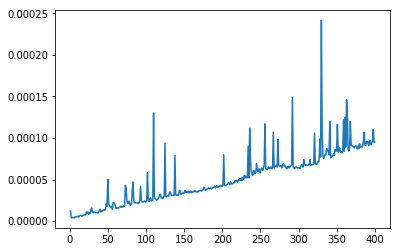

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time

def plot_time_vs_n_elements(n, element):
    """
        This function plots the dependency between n elements to delete and the time it takes

        :param n: max number of elements
        :type n: int
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: None
        :rtype: NoneType
    """
    times_list = []
    share_of_elements = 0.34
    
    for _ in range(1,n+1):
        
        arr = [np.random.choice(np.arange(0, 6), p=[share_of_elements] + [(1-share_of_elements)/5] * 5) for i in range(_)]        
        
        time_started = time.time()
        delete_zeros_from_array(arr)
        
        time_elapsed = time.time() - time_started
        
        times_list.append(time_elapsed)
        
    plt.plot(range(1, n+1), times_list)

    
    
plot_time_vs_n_zeros = partial(plot_time_vs_n_elements, element=0)
    
plot_time_vs_n_zeros(400)

Зачем нужна doc string? Как её посмотерть?

### Домашнее задание №1 [0.05 балла]

**Условие**:

Написать функцию (-и), которая принимает на вход 3 комплексных числа и выводит минимальное из них по модулю без использования функций min, max, sort и т.д.


**Комментарии**:

1) В процессе сдачи задания, можно будет получить дополнительные баллы

2) Код должен быть пригоден для промышленного использования

In [1]:
import sys

def get_min_abs_complex_number(*args):
    """
        This function find the minimum abs complex number

        :param *args: complex numbers
        :type n: complex
        
        :returns: min absolute complex number
        :rtype: complex
    """
    min_value = sys.maxsize
    min_number = None
    
    for number in args:
        if type(number) != complex:
            raise ValueError('Some of the numbers passed are not complex')
        elif abs(number)<min_value:
            min_value = abs(number)
            min_number = number
            
    return min_number

In [2]:
get_min_abs_complex_number(complex(1,2), complex(-1,1))

(-1+1j)

### Домашнее задание №2 [0.18 балла]

**Условие**:

Вы - банкомат, который работает по следующей схеме: считывает номер вставленной в него карты, парсит его на 4 равные части и генерирует 4 числа Фибоначчи с номерами, соответствущими распаршенным частям. Затем генерирует числа из всевозможных перестановок полученных чисел Фибоначчи (конкатенацией).

Для каждого числа из полученного набора банкомат находит НОД с введеным пользователем паролем и возвращает медиану из полученных НОДов. 

**Комментарии**:

1) Поток клиентов большой, операции повторяющиеся - хорошо бы, чтобы со временем банкомат отвечал быстрее на запросы.

2) За неполное решение также дается часть баллов.

**Ключевые слова**: lru_cache, permutations, алгоритм Евклида

In [7]:
from itertools import permutations
from functools import lru_cache
from math import gcd
from statistics import median

In [242]:
def parse_number_from_string(number):
    """
        Function parses the provided string into number
        
        :param password: User string. 
        :type card_number: string
        
        :returns: parsed string
        :rtype: int
    """
    
    if (type(number) != str) or (len(number) == 0):
        raise TypeError
    
    parsed_number = ""
    encountered_non_null = False
    
    for _ in range(len(number)):
        if number[_] not in "0123456789":
            raise ValueError('number should only contain digits')
        
        if (number[_] != '0') or (encountered_non_null): 
            parsed_number += number[_]
            encountered_non_null = True
    
    if len(parsed_number)>0:
        return int(parsed_number)
    else:
        return 0

        
    
# def get_n_fibonacci_numbers(numbers_list): 
#     """
#         Function  generates n fibonacci numbers
        
#         :param numbers_list: n 4 digit numbers
#         :type numbers_list:  list[int] 
        
#         :returns: list of fibonacci numbers
#         :rtype: list[int]
#     """
#     fib_array = [0,1]
#     result_array = []
    
        
#     for n in numbers_list:
#         if n>=len(fib_array):
#             for i in range(len(fib_array), n+1):
#                 fib_array.append(fib_array[i-1] + fib_array[i-2])
#         result_array.append(fib_array[n])
#     return result_array

@lru_cache(maxsize=200)
def get_fibonacci_number(n):
    """
        Function  generates  fibonacci number
        
        :param n: number
        :type n:  int
        
        :returns: fibonacci number
        :rtype: int
    """
    fib_array = [0,1]
    if n>=len(fib_array):
        for i in range(len(fib_array), n+1):
            fib_array.append(fib_array[i-1] + fib_array[i-2])
    return fib_array[n]

                       
def get_concat_permutations(fib_numbers):
    
    fib_numbers_strings = [str(item) for item in fib_numbers]
    ls = []
    
    for _ in permutations(fib_numbers_strings):
        ls.append(parse_number_from_string(''.join(_)))
    
    return ls
    
def get_gcd_median(card_number, password):
    """
        Function works according to the problem set above (too lazy to translate it to English)
        
        :param card_number: Number of the credit card inserted. Length should be divisible by 4
        :type card_number: string
        :param password: User password. 
        :type card_number: string
        
        :returns: gcd
        :rtype: int
    """
    
    # if the password starts from 0, let's delete leading zero for it to be parseable
    password = parse_number_from_string(password)
    
    if (len(card_number) % 4 != 0) or len(card_number) == 0:
        raise ValueError('Card number should be divisible by 4')
    
    #card number can start from 0 as well
    bins = [parse_number_from_string(card_number[i:i+4]) for i in range(0, len(card_number), 4)]    
    #fib_numbers = get_n_fibonacci_numbers(bins)
    fib_numbers = list(map(get_fibonacci_number, bins))
    concat_permutations = get_concat_permutations(fib_numbers)
    gcd_numbers = [gcd(number, password) for number in concat_permutations]
    
    return median(gcd_numbers)

In [241]:
get_gcd_median('123456785746', '4876')

1.0

### Домашнее задание №3 [0 - 0.1 балла]

**Условие:**
    
Сравнить скорость работы и потребление памяти list и deque.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.

In [11]:
from collections import deque
from random import randint

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

plt.rcParams['figure.figsize'] = (18,7)

import pandas as pd

In [23]:
def calculate_rolling_mean(arr, window=40):   
    """
        Calculates rolling mean with a chosen window

        :param arr: list of the values to calculate rollling mean
        :type arr: list[float]
        :param window: Window length 
        :type window: int

        :returns: pandas series with calculated rollig means
        :rtype: pd.Series
    """
    return pd.Series(arr).rolling(window=window).mean()


def check_time_memory(n, structure, method_tuple, skip_every):
    """
        Checks time and memory it takes to use method on structure

        :param n: generate arrays up to n elements
        :type n: int
        :param structure: structure to use over array
        :type structure: class

        :returns: tuple with calculated metrics
        :rtype: tuple
    """
    
    times_list = []
    index_list = []
    memory_list = []
    
    for arr_length in range(1, n+1, skip_every):
        arr = [_ for _ in range(arr_length)]
        
        if structure is not None:
            arr = structure(arr)

        if len(method_tuple) == 1:
            time_started = time.time()
            method_tuple[0](arr)
        else:
            time_started = time.time()
            method_tuple[0](arr, *method_tuple[1:])
        time_elapsed = time.time() - time_started
        
        memory_list.append(sys.getsizeof(arr))
        times_list.append(time_elapsed)
        index_list.append(arr_length)
    
    return times_list, index_list, memory_list

def plot_memory_time(time1, time2, memory1, memory2, index_list, window, structure1, structure2):
    """
         Plots the graphs with time and space results

        :returns: None
        :rtype: nonetype
    """
    plt.subplot(1,2,1)
    plt.title('Time')
    plt.plot(index_list, calculate_rolling_mean(time1, window),color='red', label=str(structure1) )
    plt.plot(index_list, calculate_rolling_mean(time2, window),  color='green', label=str(structure2))
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title('Memory')
    plt.plot(index_list, calculate_rolling_mean(memory1, window),  color='red', label=str(structure1))
    plt.plot(index_list, calculate_rolling_mean(memory2, window), color='green', label=str(structure2))
    plt.legend()
    

def compare_two_structures(structure1, structure2, method1_tuple, method2_tuple, n=30000, skip_every=50, window=40):
    """
        Compares two structures and plots the graphs
        TODO: can be modified to take N structures and methods as input
        
        :param structure1, structure2: structure to use over array
        :type structure1, structure2: tuple
        :param method1, method2: method to use over array
        :type method1, method2: tuple
        :param n: generate arrays up to n elements
        :type n: int
        :param window: Window length  when calculating rolling mean
        :type window: int     
        :param window: Window length  when calculating rolling mean
        :type window: int     
        :param skip_every: step to increase counter when going up to n 
        :type skip_every: int     


        :returns: None
        :rtype: nonetype
    """  
    if (type(skip_every) != int) and (skip_every<=0):
        raise ValueError
    if (type(window) != int) and (window<=0):
        raise ValueError
             
    res1 = check_time_memory(n, structure1, method1_tuple, skip_every)
    res2 = check_time_memory(n, structure2, method2_tuple, skip_every)
        
    plot_memory_time(res1[0], res2[0], res1[2], res2[2], res1[1], window, str(structure1) + '-' +  str(method1_tuple[0]), 
                                     str(structure2)  + '-' + str(method2_tuple[0]))

Let's compare methods according to [OfficialDocs](https://docs.python.org/2/library/collections.html)

1. Append to right

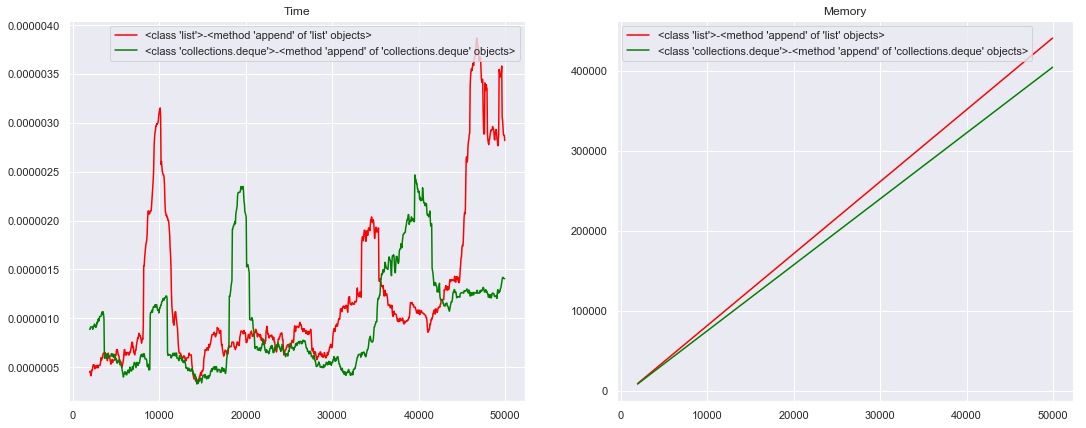

In [24]:
compare_two_structures(list, deque, (list.append, 1), (deque.append, 1 ), n=50000)

2. Append to the beginning

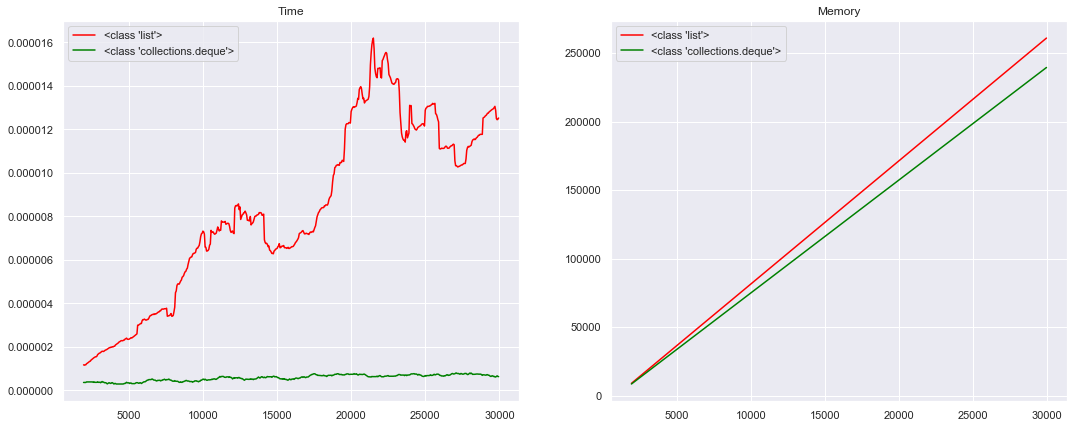

In [16]:
compare_two_structures(list, deque, (list.insert, 0, 0), (deque.appendleft, 1 ))

3. pop right

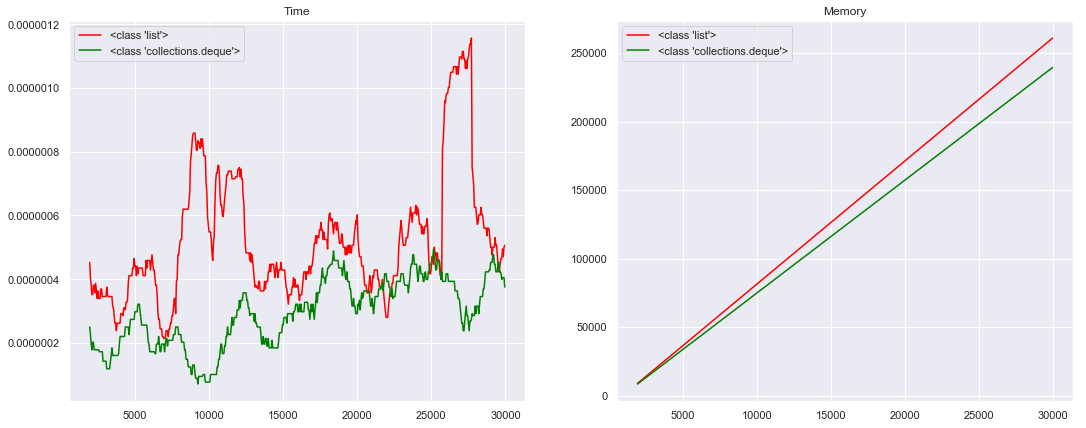

In [18]:
compare_two_structures(list, deque, (list.pop, ), (deque.pop, ))

3. pop left

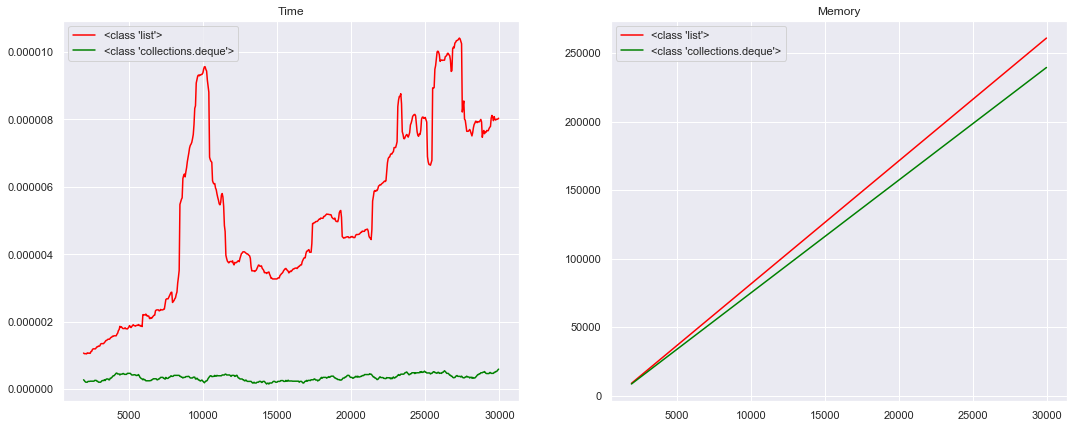

In [19]:
compare_two_structures(list, deque, (list.pop, 0), (deque.popleft, ))

### Домашнее задание №4 [0 - 0.1 балла]

**Условие:**
    
Написать аналог permutations и провести сравнение скорости работы и потребления памяти.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.

In [26]:
from itertools import permutations

def permutations_custom(ls): 
    """
         Computes permutations of the elements of the given list
        :param ls: input list
        :type ls: list

        :returns: None
        :rtype: nonetype
    """
    res = [] 
    if len(ls) == 1:
        return [ls]

    for i in range(len(ls)): 
        m = ls[i] 
        for i in permutations_custom(ls[:i] + ls[i+1:]): 
            res.append([m] + i) 
    return res

def check_itertools_permutations(ls):
    return list(permutations(ls))

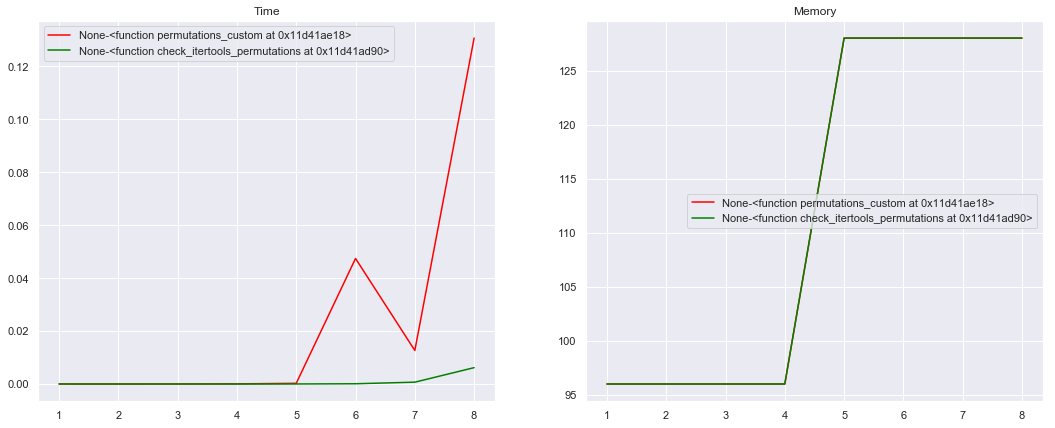

In [25]:
compare_two_structures(None, None, (permutations_custom, ), (check_itertools_permutations, ), n=8, skip_every=1, 
                      window = 1)